In [1]:
import pandapower as pp
import pandapower.networks as pn
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Network modeling

In [2]:
network = pp.create_empty_network() #create an empty network

## 1.1 model the buses

In [3]:
# vn_kv: grid voltage level, type: "b"->"busbar", zone: grid region, 
                  # max_vm_pu: maximum bus voltage in p.u., min_vm_pu: minimum bus voltage in p.u.
b0 = pp.create_bus(network, name="0", vn_kv=100, type="b", zone=1, 
                   in_service=True, max_vm_pu=1.06, min_vm_pu=0.94, geodata=(0, 5)) 
b1 = pp.create_bus(network, name="1", vn_kv=100, type="b", zone=1, 
                   in_service=True, max_vm_pu=1.06, min_vm_pu=0.94, geodata=(0, 0)) 
b2 = pp.create_bus(network, name="2", vn_kv=100, type="b", zone=1, 
                   in_service=True, max_vm_pu=1.06, min_vm_pu=0.94, geodata=(5, 5)) 
b3 = pp.create_bus(network, name="3", vn_kv=100, type="b", zone=1, 
                   in_service=True, max_vm_pu=1.06, min_vm_pu=0.94, geodata=(10, 5)) 
b4 = pp.create_bus(network, name="4", vn_kv=100, type="b", zone=1, 
                   in_service=True, max_vm_pu=1.06, min_vm_pu=0.94, geodata=(10, 0)) 

In [4]:
network.bus

,name,vn_kv,type,zone,in_service,min_vm_pu,max_vm_pu
0,0,100.0,b,1,True,0.94,1.06
1,1,100.0,b,1,True,0.94,1.06
2,2,100.0,b,1,True,0.94,1.06
3,3,100.0,b,1,True,0.94,1.06
4,4,100.0,b,1,True,0.94,1.06


## 1.2 model the loads

In [5]:
# p_mw: The real power of the load, q_mvar: The reactive power of the load
# whether a load is controllable or not. Only respected for OPF
pp.create_load(network, b1, p_mw=20, q_mvar=10, controllable=False, in_service=True)
pp.create_load(network, b2, p_mw=20, q_mvar=15, controllable=False, in_service=True)
pp.create_load(network, b3, p_mw=50, q_mvar=30, controllable=False, in_service=True)
pp.create_load(network, b4, p_mw=60, q_mvar=40, controllable=False, in_service=True)

3

In [6]:
network.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type,controllable
0,None,1,20.0,10.0,0.0,0.0,NaN,1.0,True,None,False
1,None,2,20.0,15.0,0.0,0.0,NaN,1.0,True,None,False
2,None,3,50.0,30.0,0.0,0.0,NaN,1.0,True,None,False
3,None,4,60.0,40.0,0.0,0.0,NaN,1.0,True,None,False


## 1.3 model the generators (non-slack)

In [7]:
# pp.create_gen(network, b0, p_mw=0, vm_pu=1.06, max_p_mw=100, min_p_mw=10, max_q_mvar=50, min_q_mvar=10,
#               in_service=True)
# p_mw (float, default 0) - The real power of the generator (positive for generation!)
# vm_pu (float, default 0) - The voltage set point of the generator
# max_p_mw (float, default NaN) - Maximum active power injection - necessary for OPF
# min_p_mw (float, default NaN) - Minimum active power injection - necessary for OPF
# max_q_mvar (float, default NaN) - Maximum reactive power injection - necessary for OPF
# min_q_mvar (float, default NaN) - Minimum reactive power injection - necessary for OPF
pp.create_gen(network, b1, p_mw=40, vm_pu=1.045, max_p_mw=100, min_p_mw=10, max_q_mvar=50, min_q_mvar=10,
              in_service=True, controllable=True)
pp.create_gen(network, b2, p_mw=30, vm_pu=1.03, max_p_mw=100, min_p_mw=10, max_q_mvar=40, min_q_mvar=10,
              in_service=True, controllable=True)

1

In [8]:
network.gen

,name,bus,p_mw,vm_pu,sn_mva,min_q_mvar,max_q_mvar,scaling,slack,in_service,type,controllable,min_p_mw,max_p_mw
0,None,1,40.0,1.045,NaN,10.0,50.0,1.0,False,True,None,True,10.0,100.0
1,None,2,30.0,1.030,NaN,10.0,40.0,1.0,False,True,None,True,10.0,100.0


## 1.4 model the slack generator

In [9]:
# vm_pu (float, default 1.0) - voltage at the slack node in per unit
# va_degree (float, default 0.) - voltage angle at the slack node in degrees
# max_p_mw (float, NaN) - Maximum active power injection. Only respected for OPF
# min_p_mw (float, NaN) - Minimum active power injection. Only respected for OPF
# max_q_mvar (float, NaN) - Maximum reactive power injection. Only respected for OPF
# min_q_mvar (float, NaN) - Minimum reactive power injection. Only respected for OPF
pp.create_ext_grid(network, b0, vm_pu=1.06, max_p_mw=100, min_p_mw=10, max_q_mvar=50, min_q_mvar=10)

0

In [10]:
network.ext_grid

,name,bus,vm_pu,va_degree,in_service,min_p_mw,max_p_mw,min_q_mvar,max_q_mvar
0,None,0,1.06,0.0,True,10.0,100.0,10.0,50.0


## 1.5 model the lines (branches)

In [11]:
# from_bus (int) - ID of the bus on one side which the line will be connected with
# to_bus (int) - ID of the bus on the other side which the line will be connected with
# length_km (float) - The line length in km
# r_ohm_per_km (float) - line resistance in ohm per km
# x_ohm_per_km (float) - line reactance in ohm per km
# c_nf_per_km (float) - line capacitance in nano Farad per km                        
# max_i_ka (float) - maximum thermal current in kilo Ampere
# type (str, None) - type of line (“ol” for overhead line or “cs” for cable system)
# max_loading_percent (float) - maximum current loading (only needed for OPF)
pp.create_line_from_parameters(network, from_bus=0, to_bus=1, length_km=1, 
                               r_ohm_per_km=2, x_ohm_per_km=6, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')
pp.create_line_from_parameters(network, from_bus=0, to_bus=2, length_km=1, 
                               r_ohm_per_km=8, x_ohm_per_km=24, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')
pp.create_line_from_parameters(network, from_bus=1, to_bus=2, length_km=1, 
                               r_ohm_per_km=6, x_ohm_per_km=18, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')
pp.create_line_from_parameters(network, from_bus=1, to_bus=3, length_km=1, 
                               r_ohm_per_km=6, x_ohm_per_km=18, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')
pp.create_line_from_parameters(network, from_bus=1, to_bus=4, length_km=1, 
                               r_ohm_per_km=4, x_ohm_per_km=12, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')
pp.create_line_from_parameters(network, from_bus=2, to_bus=3, length_km=1, 
                               r_ohm_per_km=1, x_ohm_per_km=3, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')
pp.create_line_from_parameters(network, from_bus=3, to_bus=4, length_km=1, 
                               r_ohm_per_km=8, x_ohm_per_km=24, c_nf_per_km=0, max_i_ka=0.866025, 
                               max_loading_percent=100, type='ol')

6

In [12]:
network.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service,max_loading_percent
0,None,None,0,1,1.0,2.0,6.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0
1,None,None,0,2,1.0,8.0,24.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0
2,None,None,1,2,1.0,6.0,18.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0
3,None,None,1,3,1.0,6.0,18.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0
4,None,None,1,4,1.0,4.0,12.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0
5,None,None,2,3,1.0,1.0,3.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0
6,None,None,3,4,1.0,8.0,24.0,0.0,0.0,0.866025,1.0,1,ol,True,100.0


## 1.6 create cost functions for generators (only for OPF problem)

In [13]:
# et (string) - Type of element [“gen”, “sgen”, “ext_grid”, “load”, “dcline”, “storage”] are possible
# cp2_eur_per_mw2=0 (float) - Quadratic costs per MW
# cp1_eur_per_mw (float) - Linear costs per MW
# cp0_eur=0 (float) - Offset active power costs in euro
pp.create_poly_cost(network, element=0, et='ext_grid', cp2_eur_per_mw2=0.11, cp1_eur_per_mw=5, cp0_eur=150)
pp.create_poly_cost(network, element=0, et='gen', cp2_eur_per_mw2=0.085, cp1_eur_per_mw=1.2, cp0_eur=600)
pp.create_poly_cost(network, element=1, et='gen', cp2_eur_per_mw2=0.1225, cp1_eur_per_mw=1.0, cp0_eur=335)

2

In [14]:
network.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,ext_grid,150.0,5.0,0.1100,0.0,0.0,0.0
1,0,gen,600.0,1.2,0.0850,0.0,0.0,0.0
2,1,gen,335.0,1.0,0.1225,0.0,0.0,0.0


In [15]:
network

This pandapower network includes the following parameter tables:
   - bus (5 elements)
   - load (4 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (7 elements)
   - poly_cost (3 elements)
   - bus_geodata (5 elements)

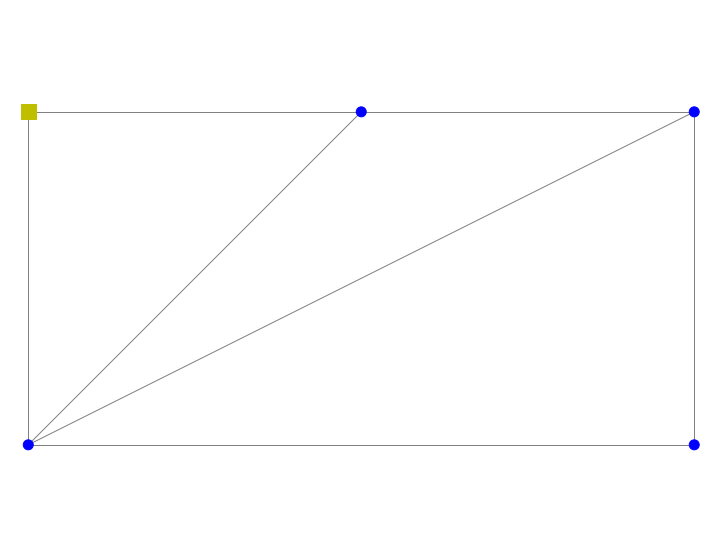

In [244]:
pp.plotting.simple_plot(network)

# 2. Power flow

## 2.1 DC power flow

In [16]:
pp.rundcpp(network, verbose=True)
print(network.res_line) # power flow between buses
print(network.res_bus)  # power and voltage at buses

   p_from_mw  q_from_mvar    p_to_mw  q_to_mvar  pl_mw  ql_mvar  i_from_ka  \
0  57.571429          0.0 -57.571429        0.0    0.0      0.0   0.313574   
1  22.428571          0.0 -22.428571        0.0    0.0      0.0   0.122162   
2  10.714286          0.0 -10.714286        0.0    0.0      0.0   0.059195   
3  17.904762          0.0 -17.904762        0.0    0.0      0.0   0.098922   
4  48.952381          0.0 -48.952381        0.0    0.0      0.0   0.270456   
5  43.142857          0.0 -43.142857        0.0    0.0      0.0   0.241830   
6  11.047619          0.0 -11.047619        0.0    0.0      0.0   0.063783   

    i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  va_to_degree  \
0  0.318075  0.318075       1.060        0.000000     1.045     -1.979160   
1  0.125720  0.125720       1.060        0.000000     1.030     -3.084150   
2  0.060057  0.060057       1.045       -1.979160     1.030     -3.084150   
3  0.103373  0.103373       1.045       -1.979160     1.000     -3.

## 2.2 AC power flow

In [237]:
pp.runpp(network, verbose=False)
print(network.res_line) # power flow between buses
print(network.res_bus)  # power and voltage at buses

   p_from_mw  q_from_mvar    p_to_mw  q_to_mvar     pl_mw   ql_mvar  \
0  60.003686     7.395625 -59.353074  -5.443789  0.650612  1.951836   
1  23.191266     6.013214 -22.782584  -4.787169  0.408682  1.226045   
2  10.931295     5.135644 -10.851150  -4.895208  0.080145  0.240436   
3  18.229238    10.397162 -17.987262  -9.671234  0.241976  0.725927   
4  50.192541    35.322531 -48.812729 -31.183096  1.379812  4.139435   
5  43.633734    30.446845 -43.366893 -29.646322  0.266841  0.800522   
6  11.354155     9.317557 -11.187271  -8.816904  0.166884  0.500653   

   i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  \
0   0.329295  0.329295  0.329295    1.060000        0.000000  1.045000   
1   0.130493  0.130493  0.130493    1.060000        0.000000  1.030000   
2   0.066727  0.066727  0.066727    1.045000       -1.785996  1.030000   
3   0.115944  0.115944  0.115944    1.045000       -1.785996  1.016942   
4   0.339093  0.339093  0.339093    1.045000       -1.785996 

# 3. Optimal Power Flow

## 3.1 DC-OPF

In [238]:
pp.rundcopp(network, verbose=False)
print(network.res_ext_grid) # power generation of slack generator
print(network.res_gen)      # power generation of non-slack generators
print(network.res_cost)     # optimal total cost

        p_mw  q_mvar
0  34.874013     NaN
        p_mw  q_mvar  va_degree  vm_pu
0  67.484016     NaN  -0.801583    1.0
1  47.641971     NaN  -1.589191    1.0
2186.9176382098535


## 3.2 AC-OPF

In [239]:
pp.runopp(network, verbose=False)
print(network.res_ext_grid) # power generation of slack generator
print(network.res_gen)      # power generation of non-slack generators
print(network.res_cost)     # optimal total cost

        p_mw     q_mvar
0  35.066429  11.677907
        p_mw     q_mvar  va_degree     vm_pu
0  68.417900  49.999996  -0.651274  1.051548
1  48.739197  39.992676  -1.252976  1.041423
2215.320472724633


# 4. Loading data from external

## 4.1 Save and load with pickle

In [18]:
pp.to_pickle(network, 'example1.p')

In [19]:
network_reload = pp.from_pickle('example1.p')

## 4.2 Load data from MATPOWER

In [20]:
network2 = pp.converter.from_mpc('example1.mat')

In [21]:
network2

This pandapower network includes the following parameter tables:
   - bus (5 elements)
   - load (4 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (7 elements)
   - poly_cost (3 elements)

## 4.3 Load built-in data

In [24]:
case9 = pn.case9()

In [27]:
case9

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [29]:
case118 = pn.case118()

In [30]:
case118

This pandapower network includes the following parameter tables:
   - bus (118 elements)
   - load (99 elements)
   - gen (53 elements)
   - shunt (14 elements)
   - ext_grid (1 element)
   - line (173 elements)
   - trafo (13 elements)
   - poly_cost (54 elements)
   - bus_geodata (118 elements)

In [31]:
pp.runopp(case118)

In [32]:
case118.res_cost

129695.1018738289